## Exercise 1

In [1]:
import interpolation 
import numpy as np
import scipy as sc
import scipy.stats
from scipy.special import erf
import random as rd
import matplotlib.pyplot as plt
import math

def third_function_pdf(x,x0, sigma):
    numerator = np.exp(-np.power(x - x0, 2.) / (2 * sigma**2)) * (1/ (sigma*np.sqrt(2 * np.pi))) - np.exp(-np.power(x + x0, 2.)/ (2 * sigma**2)) * (1/ (sigma * np.sqrt(2 * np.pi)))
    return erf(x0/math.sqrt(2*sigma)) * numerator

Interpolating the functions


In [2]:
pdf_object = interpolation.PDF()
x_gauss = np.linspace(-5, 5, 500)
y_gauss = [pdf_object.gaussian_oned_pdf(a,0,1) for a in x_gauss]
gauss_generator = interpolation.LinearInterp(x_gauss, y_gauss, [-3,3])

x_third = np.linspace(0, 10, 500)
y_third = [third_function_pdf(a, 4, 1) for a in x_third]
third_generator = interpolation.LinearInterp(x_third, y_third,[0,10])




We do the same procedure for all the possible $N$. First, generate $N$ points using our interpolation. Then, binning the lists of points for each distribution. Next, we compute the relative error for the expected number of points in each bin and make plots.

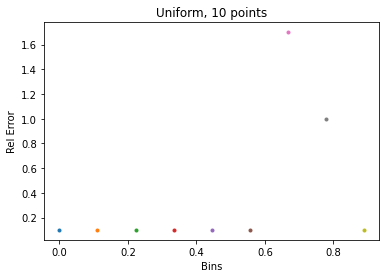

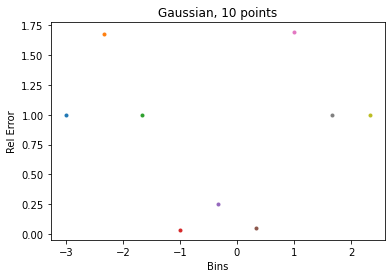

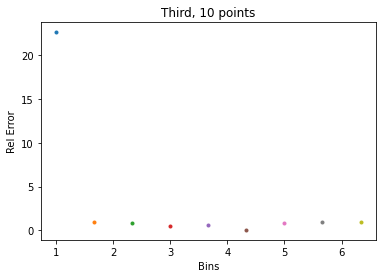

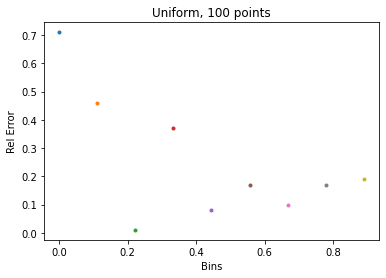

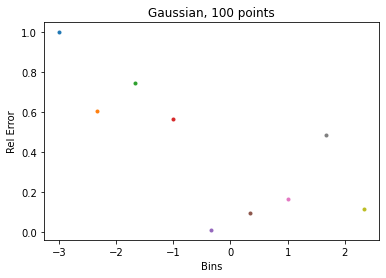

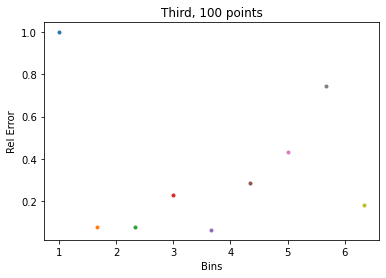

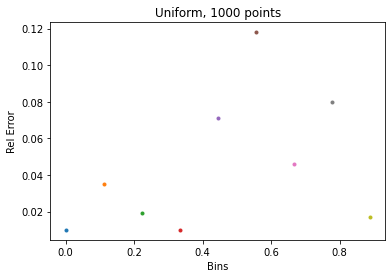

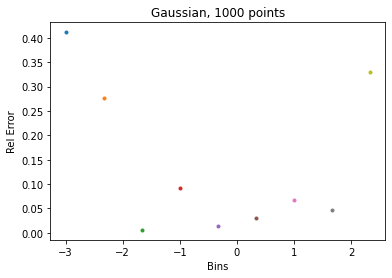

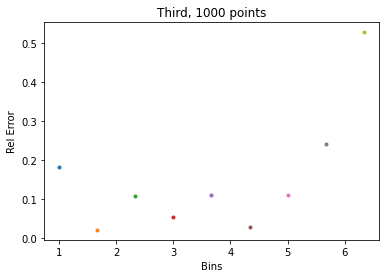

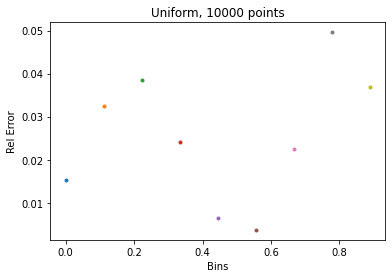

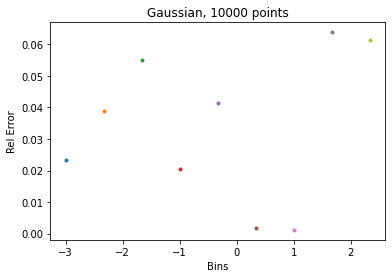

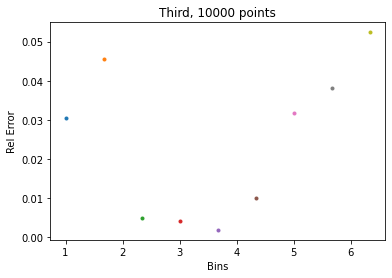

In [3]:
N_list = [10,100, 1000, 10000]
error_list = []
for N in N_list:
    uniform_list = []
    gaussian_list = []
    third_list = []
    
    for a in range (0, N): #This for generate the N points for each distribution
        uniform_list.append(rd.random())
        new_point_gauss= gauss_generator.generate_random_point()
        gaussian_list.append(new_point_gauss[0])
        new_point_third =third_generator.generate_random_point()
        third_list.append(new_point_third[0])
    #Below, we make the binning of the generated points for each distribution
    uniform_binned_list = np.histogram(uniform_list,bins=np.linspace(0,1,10))
    gaussian_binned_list = np.histogram(gaussian_list,bins=np.linspace(-3,3,10))
    third_binned_list = np.histogram(third_list,bins=np.linspace(1,7,10))

    function_list = [uniform_list, gaussian_list, third_list]
    generator_list = [0, gauss_generator, third_generator]
    bin_f_list = [uniform_binned_list, gaussian_binned_list, third_binned_list]
    title_list = ['Uniform','Gaussian','Third']
   #In this loop, we compute the expected value of points for each bin, and then compare to the actual number of points in bin_f_list
    for b in range(0,3):
        generator = generator_list[b]
        function = function_list[b]
        error_n_list = []
        for a in range(0, 9):
            if generator == 0:
                integral =  (bin_f_list[b][1][a+1] - bin_f_list[b][1][0]) / (bin_f_list[b][1][-1] - bin_f_list[b][1][0]) - (bin_f_list[b][1][a] - bin_f_list[b][1][0]) / (bin_f_list[b][1][-1] - bin_f_list[b][1][0])
            else:
                integral = generator.do_cumulative(bin_f_list[b][1][a], bin_f_list[b][1][a+1])
            error_n_list.append((bin_f_list[b][1][a],abs(bin_f_list[b][0][a] /( integral * N) -1)))
            plt.plot(bin_f_list[b][1][a],abs(bin_f_list[b][0][a] /( integral * N) -1), '.')
        error_list.append(error_n_list)
        plt.title(f'{title_list[b]}, {N} points')
        plt.xlabel('Bins')
        plt.ylabel('Rel Error')
        plt.show()

## Exercise 2
    

\begin{align}
		\bar{x} = \sum_{i=1}^N \frac{x_i}{N}, \quad \mathrm{e}\quad \bar{V} = \sum_{i=1}^N \frac{(x_i-\bar{x})^2}{N},
\end{align}

In [4]:
def mean_function(points):
    den = len(points)
    sum_p = [a/den for a in points]
    return np.sum(sum_p)

def var_function(points, mean):
    den = len(points)
    var_p = [(a - mean)**2 / den for a in points]
    return np.sum(var_p)

The last mean was:0.003063197688933821 and the last variance was:0.8588147247037536


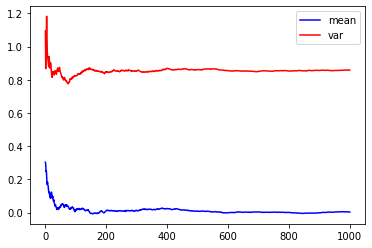

In [5]:
mean_list_i= []
var_list_i = []
mean_list = []
var_list = []
for b in range(0,1000):
    point_list = []
    for a in range (0, 10): #This for generate the N points for each distribution
        new_point_gauss= gauss_generator.generate_random_point()
        point_list.append(new_point_gauss[0])
    mean_i = mean_function(point_list)
    var_i = var_function(point_list, mean_i)
    mean_list_i.append(mean_i)
    var_list_i.append(var_i)
    mean_list.append(np.sum(mean_list_i)/ len(mean_list_i))
    var_list.append(np.sum(var_list_i)/ len(var_list_i))
x_list = np.linspace(1,1000,1000)
plt.plot(x_list,mean_list, '-',color='blue',label='mean' )
plt.plot(x_list,var_list, '-',color='red', label = 'var' )
print(f'The last mean was:{mean_list[-1]} and the last variance was:{var_list[-1]}')
plt.legend()
plt.show()

The variance and the mean tend to approach more the real values of $0$ and $1$ for more calculations, although the variance estimator was not that close to the real value as the mean estimator.

## Exercise 3

\begin{align}
\gamma &= \frac{1}{N\sigma^3} \sum_i (x_i - \bar{x})^3, \quad c = \frac{1}{N\sigma^4} \sum_i (x_i - \bar{x})^4 -3
\end{align}

In [25]:
def skew(x, sigma, mean):
    list_sum = []
    for point in x:
        list_sum.append((point - mean)**3 / (len(x) * sigma**3 ))
    return np.sum(list_sum)

def curtosis(x, sigma, mean):
    list_sum = []
    for point in x:
        list_sum.append(((point - mean)**4 / (len(x) * sigma**4)))
    return np.sum(list_sum)-3

In [31]:
x_third = np.linspace(0, 10, 500)
y_third = [third_function_pdf(a, 4, 1) for a in x_third]
third_generator = interpolation.LinearInterp(x_third, y_third,[0,10])


N_list = [10,100,1000,100000, 1000000]
for N in N_list:
    third_list = []
    for a in range (0, N): #This for generate the N points for each distribution
        new_point_third =third_generator.generate_random_point()
        third_list.append(new_point_third[0])
    mean_third = mean_function(third_list)
    sigma = np.sqrt(var_function(third_list, mean_third))
    print(skew(third_list, sigma, mean=mean_third))
    print(curtosis(third_list, sigma, mean=mean_third))

1.8486787742833273
2.6147880037496813
-0.035493972545874455
-0.2680919820091976
0.01699045858444262
0.22219667562621304
0.00580161284864359
-0.025732893368119125
0.0011270786204663
-0.009669092969713411


We can see that the results start to stabilize at $N=1000000$